# Bank data analysis 

Importing the basic Libraries

In [21]:
import pandas as pd
import numpy as np 
from sklearn import svm

In [2]:
from collections import Counter

# plotting data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

Reading the csv dataset 

In [3]:
## Reading the data
bank_data = pd.read_csv("bank-additional-full.csv",sep=';')
# bank_data_copy=bank_data.copy()

## print shape of dataset with rows and columns and information 
print ("Shape of data (row, column):"+ str(bank_data.shape))
print (bank_data.info())

Shape of data (row, column):(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  floa

## View Dataset
Let's preview the top 5 entries in the dataset. Due to limited view space we have to slide the horizontal scroll bar to view the other attributes.

In the report only the first 7 attribute (age, job, marital, education, default, housingand loan) were shown.

In [4]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Statistical Relationship

One way to gain useful insight into data is by looking at the standard measures of central tendency - mean, median and mode. It can also be helpful to see the minimum and the maximum values

In [5]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
all_attributes = ["age", "job", "marital", "education", "default", "housing",
                  "loan", "contact", "month", "day_of_week", "duration",
                  "campaign", "pdays", "previous", "poutcome", "emp.var.rate",
                  "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed",
                  "y"]

num_attributes = ["age", "duration", "campaign", "pdays", "previous",
                  "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                  "euribor3m", "nr.employed"]

print(f"{'Attribute':14s} {'Count':5s} {'%age':5s}  {'Mode':18s}    Mean   Median    Min     Max")
for att in all_attributes:
    mean = f"{bank_data[att].mean():.2f}" if att in num_attributes else "NaN"
    minval = f"{bank_data[att].min():.2f}" if att in num_attributes else "NaN"
    maxval = f"{bank_data[att].max():.2f}" if att in num_attributes else "NaN"
    
    median = f"{bank_data[att].median():.2f}" if att in num_attributes else "NaN"
    c = Counter(bank_data[att])
    count = c.most_common(1)[0][1]
    mode = f"{c.most_common(1)[0][0]}"
    print(f"{att:<14s} {count:5d} {(count/41188)*100:5.2f}  {mode:18s} {mean:>7s} {median:>7s} {minval:>7s} {maxval:>7s}")

Attribute      Count %age   Mode                  Mean   Median    Min     Max
age             1947  4.73  31                   40.02   38.00   17.00   98.00
job            10422 25.30  admin.                 NaN     NaN     NaN     NaN
marital        24928 60.52  married                NaN     NaN     NaN     NaN
education      12168 29.54  university.degree      NaN     NaN     NaN     NaN
default        32588 79.12  no                     NaN     NaN     NaN     NaN
housing        21576 52.38  yes                    NaN     NaN     NaN     NaN
loan           33950 82.43  no                     NaN     NaN     NaN     NaN
contact        26144 63.47  cellular               NaN     NaN     NaN     NaN
month          13769 33.43  may                    NaN     NaN     NaN     NaN
day_of_week     8623 20.94  thu                    NaN     NaN     NaN     NaN
duration         170  0.41  85                  258.29  180.00    0.00 4918.00
campaign       17642 42.83  1                     2.

Checking for missing data

In [7]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Data Visualization 

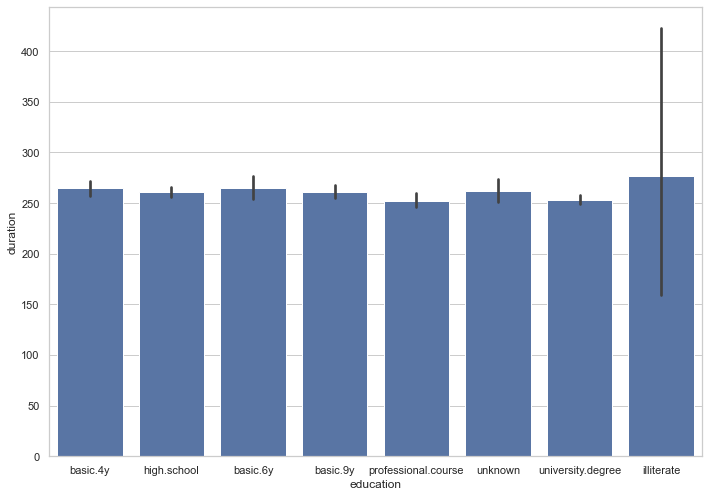

In [8]:
from matplotlib import pyplot
sns.set_theme(style="whitegrid")

a4_dim = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize = a4_dim)
ax = sns.barplot( x="education", y="duration", color="b" ,data=bank_data)

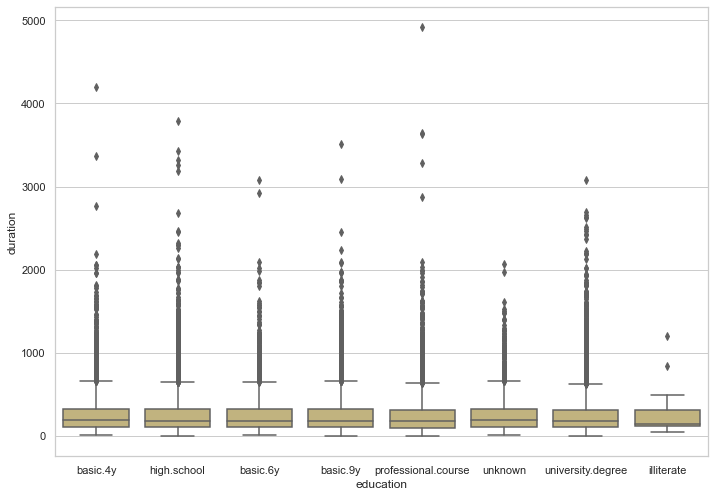

In [9]:
a4_dim = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize = a4_dim)
ax = sns.boxplot( x="education", y="duration", color="y" ,data=bank_data,)

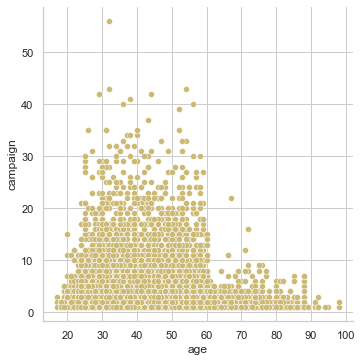

In [10]:
a4_dim = (11.7, 8.27)
#fig, ax = pyplot.subplots(figsize = a4_dim)
ax = sns.relplot( x="age", y="campaign", color="y" ,data=bank_data)

Check the relationship between each column using correlation chart

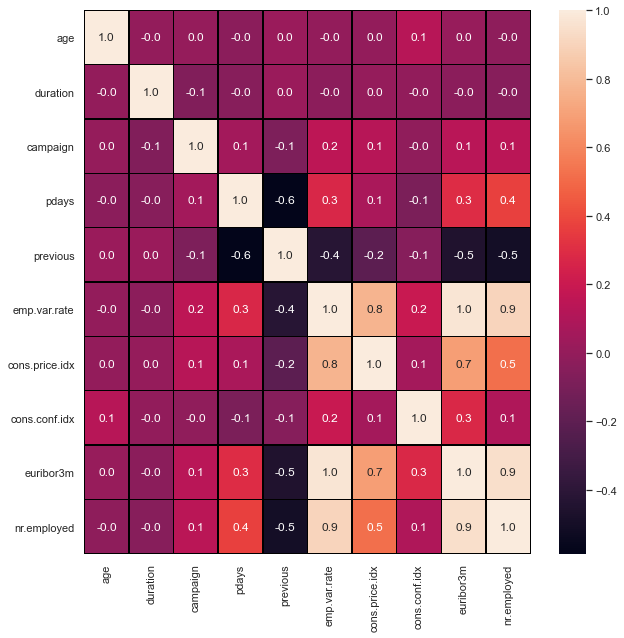

In [11]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [12]:
categorical_features = [feat for feat in bank_data.columns if bank_data[feat].dtype =='O']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [13]:
numerical_features = [feat for feat in bank_data.columns if feat not in categorical_features ]
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
bank_data["job"]= label_encoder.fit_transform(bank_data["job"])

In [15]:
bank_data["duration"]= label_encoder.fit_transform(bank_data["duration"])
bank_data["marital"]= label_encoder.fit_transform(bank_data["marital"])
bank_data["education"]= label_encoder.fit_transform(bank_data["education"])
bank_data["default"]= label_encoder.fit_transform(bank_data["default"])
bank_data["housing"]= label_encoder.fit_transform(bank_data["housing"])
bank_data["loan"]= label_encoder.fit_transform(bank_data["loan"])
bank_data["contact"]= label_encoder.fit_transform(bank_data["contact"])
bank_data["month"]= label_encoder.fit_transform(bank_data["month"])
bank_data["day_of_week"]= label_encoder.fit_transform(bank_data["day_of_week"])
bank_data["poutcome"]= label_encoder.fit_transform(bank_data["poutcome"])
bank_data["y"]= label_encoder.fit_transform(bank_data["y"])

In [16]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
y = bank_data["y"]
x =bank_data.drop("y", axis =1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

In [19]:
x_train.shape

(32950, 20)

In [20]:
x_test.shape

(8238, 20)

In [22]:
model = svm.SVC()
model.fit(x_train, y_train)
prediction = model.predict(x_test)


In [23]:
model_accuracy = model.score(x_test, y_test)

In [24]:
print(model_accuracy*100)

89.47560087399854


The model has 89% accuracy on test data, which is an indication the the model can predict about 89 data correctly from every 100 instances
